<a href="https://colab.research.google.com/github/krisnamughni24/Colab/blob/main/Congklak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Q Learning (DQN) in Traditional Congklak Game

Krisna Mughni Jiwandaru

19/444057/TK/49253

Artificial Intelligence (AI)

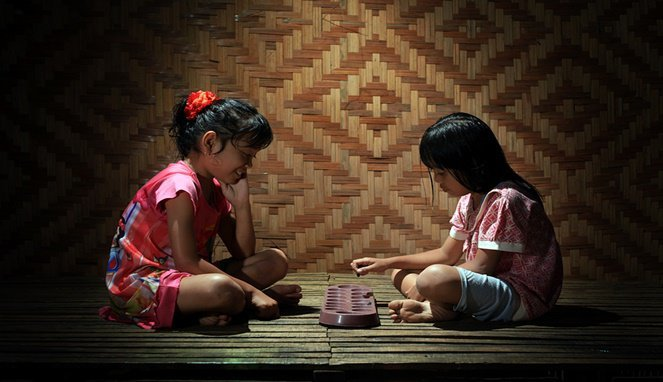

**Congklak** is a traditional game known by various names throughout Indonesia. Usually some sort of shell is used as the game's Congklak seed, but plants or small stone seeds are sometimes used if these are not available.

In Java this game is better known as congklak, dakon, dhakon' or dhakonan. In parts of Sumatra where Malay culture is common, the game is known as konkak. In Sulawesi, the game is better known by several names such as Mokaotan, Maggaleceng, Aggalacang, and Nogarata. In the origin story, the game is called Mancala, which is popular and first appeared in the Middle East and North Africa.

Congklak is played by two players. The game uses a board called Congklak Board and 98 (14 x 7) seeds called Congklak Seed. Congklak boards are usually made from wood and plastic, but seeds can be made from husks, seeds, stones, marble or plastic. There are 16 holes, consisting of 1 large hole. All seven small holes on the player's side and the large hole on the right are considered to be his.

At the start of the game, each small hole contains 7 seeds. The two players stand facing each other, with the first player choosing the hole to take, the other player entering the hole from the right, and so on counterclockwise. If the seeds are no longer small pits containing other seeds, he can take those seeds and continue to bury them. If the big hole runs out of seeds, he can choose the smaller hole on his side to continue. When he runs out of a small hole on the side, he stops and picks up all the seeds from the other side. However, if you stop at an empty hole on the other side, you will end up with nothing.

The game is over when there are no more seeds to take (all the seeds are in the big holes of both players). The winner is the one with the most seeds.

This project simulates reinforcement learning in the game of congklak. Reward will be given if the computer wins the game, in this way, the computer can find out the most effective way to win

**Additional links for this project:**

<a href="https://drive.google.com/drive/folders/14F6GRfcpAqGquIdtnUK-Bk5iuZ7DGltS?usp=sharing"> Project_dir</a>

<a href="https://drive.google.com/drive/folders/1pkeDPxbX6Of5Ys9gyLn7FkXVDNQlRnlI?usp=sharing"> Model_dir</a>

<a href="https://drive.google.com/drive/folders/1wXt5usnPiN8-A1WGJdR0afWzm1FdP3WD?usp=sharing"> Log_dir</a>

## Into to Deep Q Learning (DQN)

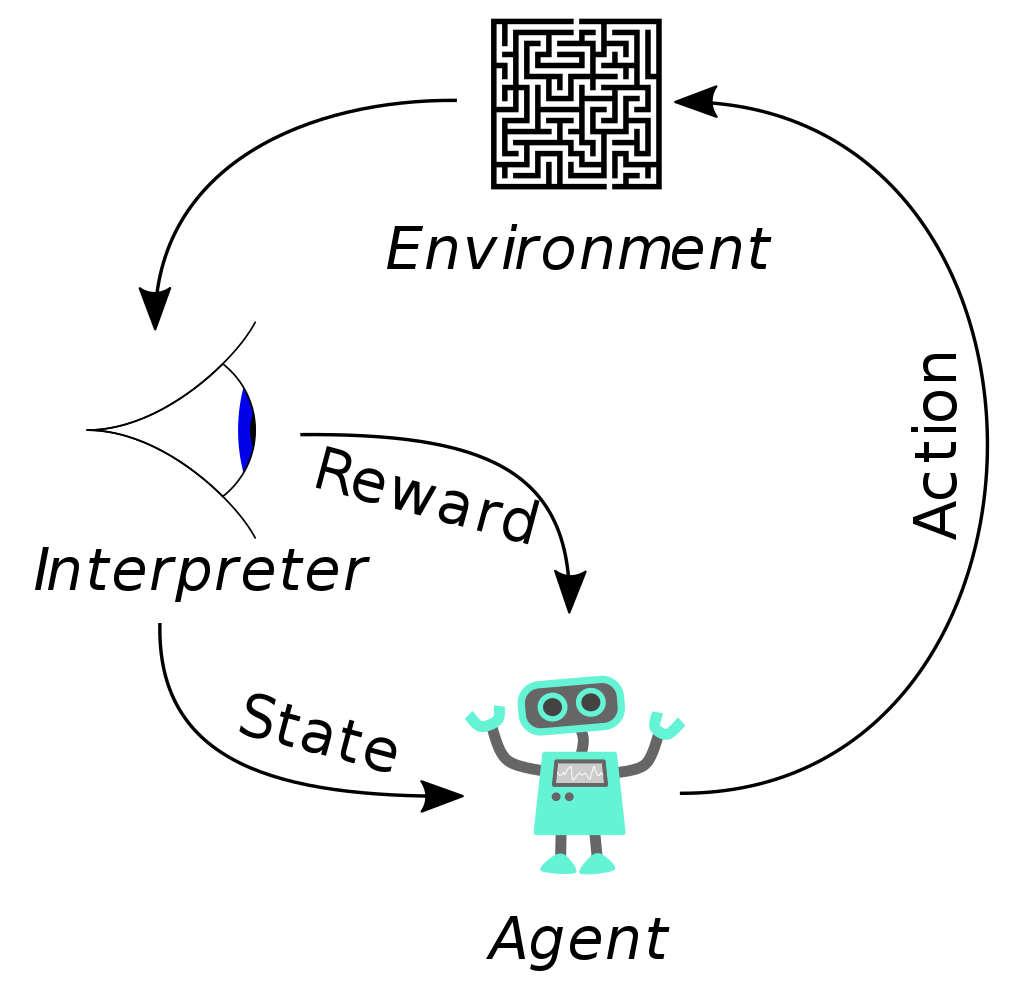

Reinforcement learning (RL) is an area of machine learning concerned with how intelligent agents ought to take actions in an environment in order to maximize the notion of cumulative reward. Reinforcement learning is one of three basic machine learning paradigms, alongside supervised learning and unsupervised learning.

Reinforcement learning differs from supervised learning in not needing labelled input/output pairs be presented, and in not needing sub-optimal actions to be explicitly corrected. Instead the focus is on finding a balance between exploration (of uncharted territory) and exploitation (of current knowledge).

Here are some important terms used in Reinforcement Learing:
*   **Agent**: It is an assumed entity which performs actions in an environment to gain some reward.
*   **Environment (e)**: A scenario that an agent has to face.
*   **Reward (R)**: An immediate return given to an agent when he or she performs specific action or task.
*   **State (s)**: State refers to the current situation returned by the environment.


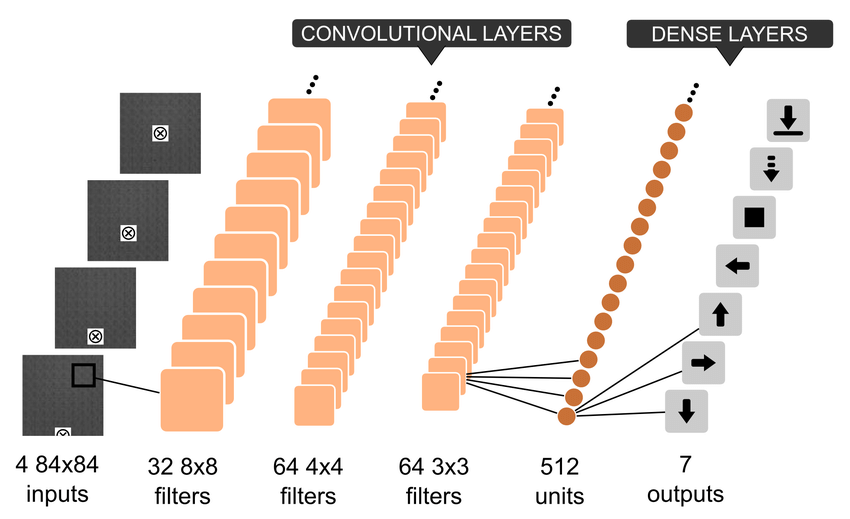

A DQN, or Deep Q-Network, approximates a state-value function in a Q-Learning framework with a neural network. In the Atari Games case, they take in several frames of the game as an input and output state values for each action as an output.

It is usually used in conjunction with Experience Replay, for storing the episode steps in memory for off-policy learning, where samples are drawn from the replay memory at random. Additionally, the Q-Network is usually optimized towards a frozen target network that is periodically updated with the latest weights every  steps (where  is a hyperparameter). The latter makes training more stable by preventing short-term oscillations from a moving target. The former tackles autocorrelation that would occur from on-line learning, and having a replay memory makes the problem more like a supervised learning problem.

In deep Q-learning, Neural network used to approximate the Q-value function. The state is given as the input and the Q-value of all possible actions is generated as the output.

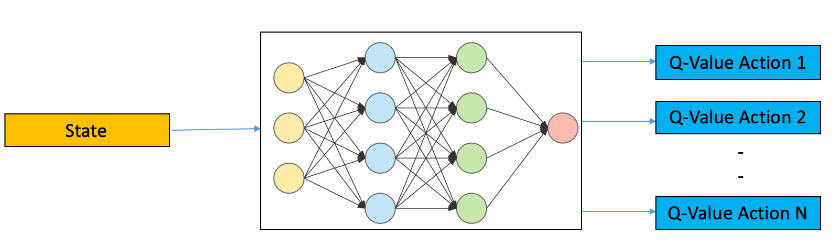

## Mount Google

Drive is used as log storage and RL models

In [ ]:
# Mount google drive to our notebook

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Import Libraries 

In [ ]:
import random # pseudo-random number generators for various distributions
import numpy as np # fundamental package for scientific computing with Python
import tensorflow as tf # libraries machine learning and artificial intelligence
from matplotlib import pyplot as plt # generating visualizations with pyplo
from collections import deque # for list append and pop operations from both the ends of the container. 
from keras.models import Sequential # API to arranging the Keras layers in a sequential order
from keras.layers import Dense # for layering where all the connections are made very deeply
from keras.optimizers import Adam # attributes in learning model such as weights and learning rate in order to reduce the losses
from keras.models import model_from_json # parses a JSON model configuration string and returns a model instance

import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

## Congklak Environment 

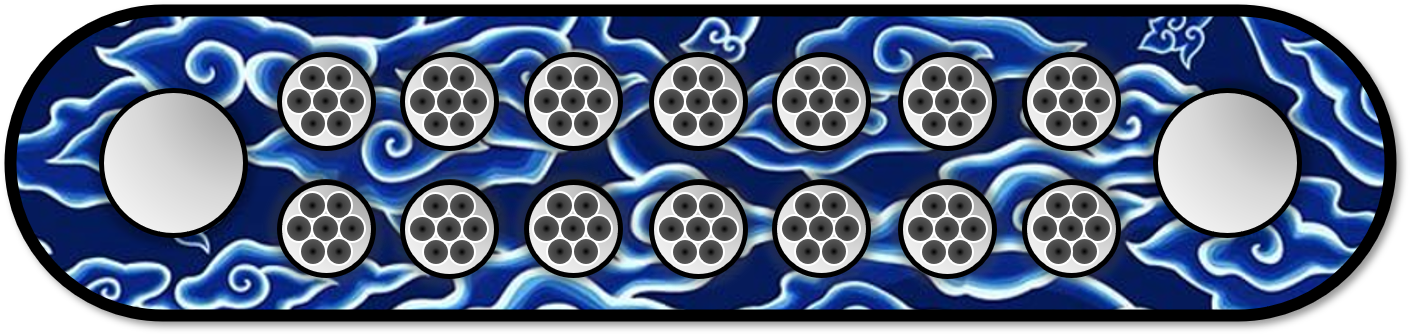

Scoring is based on the number of stones in the big hole. A small hole acts as temporary storage for state. The size of the board, which determines the number of hole for eatch player. The starting hole is the announcement of the player's first move. The difference between players is marked as 0 or 1, and T or F marks the progress of the game. logging variables use as effectively change the case from a unit change to a percent change. With some logic in the game such as limiting player movements due to legal moves or running out of stones. then the log is saved in the form of a txt file



In [ ]:
class congklak_board:
    def __init__(self):

        # array to save the score, also function as the big holes' stone counter
        self.score = np.full(shape=2, fill_value=0, dtype=np.int)
        
        # array to save the state of the board (small holes' stone counter)
        self.state = None
        
        # board size
        self.N = None
        
        # starting hole
        self.starting_hole = None
        
        # turn player marker (0 or 1, the player who goes first is 0 and the other one is 1)
        self.turn = None
        
        # the state of the game (if the game is finished, done = True)
        self.done = False
        
        # the ruleset being used for the game
        self.ruleset = None

        # logging variables
        self.turns_count = None
        self.games_count = None
        self.log = None
        
    def setup(self, board_size, max_iter, rule='original'):

        # set up the board state and the marker for turn player
        self.ruleset = rule
        self.N = board_size
        self.state = np.full(shape=int(2*self.N), fill_value=self.N, dtype=np.int)
        self.turn = 0
        self.turns_count = 0
        self.games_count = 0
        self.log = None
        self.max_iter = max_iter
        
    def reset(self):

        # reset the board
        if self.N == None:
            return print("Setup the board first.")
        else:
            self.state = np.full(shape=int(2*self.N), fill_value=self.N, dtype=np.int)
            self.score = np.full(shape=2, fill_value=0, dtype=np.int)
            self.done = False
            self.turn = 0
            self.turns_count = 0

    def observation_space(self):
        if self.N == None:
            return print("Setup the board first.")
        else:
            return (2*self.N)**2

    def action_space(self):
        if self.N == None:
            return print("Setup the board first.")
        else:
            return self.N
        
    def step(self, action):

        # update the state of the board and score
        if self.N == None:
            return print("Setup the board first.")
        else:

            # check if the action is legal
            if self.is_legal(action):

                # do the rotation
                last_hole, scoring = self.rotation()

                # if the last hole is the turn player's big hole, scoring = True --> wait for the new selection of the starting hole
                # but if the last hole is not big hole, scoring = False --> then...
                if scoring == False:

                    # if the last hole's stones = 1 --> 2 scenarios
                    if self.state[last_hole] == 1:

                        # if the last hole is the turn player's hole --> shooting --> end turn
                        if int(last_hole/self.N) == self.turn:

                            # the shooting function here is already modified.
                            # if the hole across of the last hole is NOT empty --> do the shooting
                            # else --> do nothing
                            self.shooting(last_hole)
                            self.end_turn()

                        # if the last hole is the opponent's hole --> end turn
                        else:
                            self.end_turn()

                    # if the last hole's stones > 1
                    else:

                        # if the ruleset being used is the original ruleset
                        if self.ruleset == 'original':

                            # action's range is [0,N-1], last hole's range is [0, 2N-1], self.state's range is [0, 2N-1].
                            # Action needs to be increased by self.turn*self.N to match the self.state's range.
                            # The last hole needs to be reduced by self.turn*self.N to match the action's range.
                            # repeat the rotation with starting_hole = last_hole
                            self.step(last_hole - self.turn*self.N)

                        # if the ruleset being used is the ruleset suggested by Kasim
                        elif self.ruleset == 'kasim2016':

                            # if the last hole is the turn player's hole --> same as in the original ruleset
                            # repeat the rotation with starting_hole = last_hole
                            if int(last_hole/self.N) == self.turn:
                                self.step(last_hole - self.turn*self.N)

                            # if the last hole is the opponent's hole --> end turn (rule revision by Kasim)
                            else:
                                self.end_turn()
            else:
              
                #return print("The move is illegal.")
                pass
    
    def rotation(self):
        scoring = False
        hole = int(self.starting_hole + self.turn*self.N)
        stones = self.state[hole]
        self.state[hole] = 0
        while stones > 0:
            hole += 1
            if int(hole - self.turn*self.N) == self.N:
                self.score[self.turn] += 1
                scoring = True
                stones -= 1
            if stones > 0:
                hole = hole%(2*self.N)
                self.state[hole] += 1
                scoring = False
                stones -= 1
        return hole, scoring
    
    def shooting(self, last_hole):
        d = abs(last_hole - ((self.N-1) + self.turn))
        hole_across = (self.N-1) + int(not(self.turn)) - d*(2*self.turn - 1)

        # if the hole across of the last hole is empty --> do nothing
        if self.state[hole_across] == 0:
            pass

        # if the hole across of the last hole is NOT empty --> do the shooting
        else:
            self.score[self.turn] += self.state[last_hole] + self.state[hole_across]
            self.state[last_hole] = 0
            self.state[hole_across] = 0
        #print(N-1, int(not(self.turn)), d*(2*self.turn - 1))
        
    def end_turn(self):

        # check for the winner, if there is a winner --> done = True (end the game)
        if self.score[self.turn] > self.N**2:
            self.done = True
            self.games_count += 1

        # if both player's score is equal to N**2 --> draw --> done = True (end the game)
        elif self.score[self.turn] == self.score[int(not(self.turn))] and self.score[self.turn] == self.N**2:
            self.done = True
            self.games_count += 1

        # else --> continue the game, pass the turn to the opponent
        else:
            self.turn = int(not(self.turn))
            self.turns_count += 1
        
    def is_legal(self, action):

        # check whether the move is legal/valid or not
        self.starting_hole = action
        hole = int(self.starting_hole + self.turn*self.N)
        if self.state[hole] == 0:
            return False
        else:
            return True

    def whose_turn(self):

        # check whose turn now
        if self.N == None:
            return print("Setup the board first.")
        else:
            return self.turn
        
    def possible_action(self):

        # take a random sample of possible/valid action
        pa = np.array([], dtype=np.int)
        for i in range (len(self.state[(0+self.turn*self.N):(self.N+self.turn*self.N)])):
            if self.state[(0+self.turn*self.N):(self.N+self.turn*self.N)][i] != 0:
                pa = np.append(pa, i)
        return pa

    def one_hot_state(self):

        # convert board state to one-hot-encoded board state
        input_units = np.zeros(((2*self.N)**2,))

        for i in range (len(self.state)):
            if self.state[i] > (2*self.N-1):
                input_units[i*2*self.N + 2*self.N-1] = self.state[i] - (2*self.N-1)
            else:
                input_units[i*2*self.N + self.state[i]] = 1

        return input_units

    def logging(self, score):

        # log the score
        new_log = np.concatenate((score, 0.0, 0.0, self.turns_count), axis=None).reshape(1,-1)
        if self.log is None:
            self.log = new_log
        else:
            self.log = np.append(self.log, new_log, axis=0)
        if len(self.log) >= self.max_iter*0.2:
              self.log[-1, 2] = np.average(self.log[int(len(self.log)-0.2*self.max_iter):len(self.log), 0])
              self.log[-1, 3] = np.average(self.log[int(len(self.log)-0.2*self.max_iter):len(self.log), 1])

    def log_to_txt(self, fdir):

        # saving the log to txt file
        np.savetxt(fdir + ".txt", self.log)
        print("Log score to text file")

## Training (RL)

### Agent Function (1)

In [ ]:
# the agent
class agent:
    def __init__(self, observation_space, action_space, exp_init, exp_min, decay, gamma, learning_rate, memory_size, batch):
        self.exploration_rate = exp_init
        self.EXPLORATION_MIN = exp_min
        self.DECAY_RATE = decay
        self.GAMMA = gamma
        self.LEARNING_RATE = learning_rate
        self.MEMORY_SIZE = memory_size
        self.BATCH_SIZE = batch

        self.action_space = action_space
        self.memory = deque(maxlen=MEMORY_SIZE)

        self.model = Sequential()
        self.model.add(Dense(30, input_shape=(observation_space,), activation="sigmoid"))
        self.model.add(Dense(self.action_space, activation="linear"))
        self.model.compile(loss="mse", optimizer=Adam(lr=self.LEARNING_RATE))

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() < self.exploration_rate:
            return random.randrange(self.action_space)
        q_values = self.model.predict(state.reshape(1,-1))
        return np.argmax(q_values[0])

    def experience_replay(self):
        if len(self.memory) < self.BATCH_SIZE:
            return
        batch = random.sample(self.memory, self.BATCH_SIZE)
        for state, action, reward, state_next, terminal in batch:
            q_update = reward
            if not terminal:
                q_update = (reward + self.GAMMA * np.amax(self.model.predict(state_next.reshape(1,-1))[0]))
            q_values = self.model.predict(state.reshape(1,-1))
            q_values[0][action] = q_update
            self.model.fit(state.reshape(1,-1), q_values, verbose=0)
        self.exploration_rate *= self.DECAY_RATE
        self.exploration_rate = max(self.EXPLORATION_MIN, self.exploration_rate)

    def save_model(self, fdir):

        # serialize model to JSON
        model_json = self.model.to_json()
        with open(fdir + ".json", "w") as json_file:
            json_file.write(model_json)

        # serialize weights to HDF5
        self.model.save_weights(fdir + ".h5")
        print("Saved model to disk")

    def load_model(self, fdir):

        # load json and create model
        json_file = open(fdir + ".json", "r")
        model = json_file.read()
        json_file.close()
        self.model = model_from_json(model)
        
        # load weights into new model
        self.model.load_weights(fdir + ".h5")
        self.model.compile(loss='mse', optimizer=Adam(lr=self.LEARNING_RATE), metrics=['accuracy'])
        print("Loaded model from disk")

### Hyperparameters (1)

In [ ]:
# hyperparameters and other constants setup
EXPLORATION_INIT = 1.0
EXPLORATION_MIN = 0.01
DECAY_RATE = 0.99995

# discount factor
GAMMA = 0.95

# step size for Adam
LEARNING_RATE = 0.001

# maximum capacity of the replay memory
MEMORY_SIZE = 5000

# Number of data samples from the replay memory in one step of training
BATCH_SIZE = 32

# reward function parameter
alfa = 0.8 # keeping distance from opponent
beta = 0.2 # gaining stone
zeta = 1  # winning

# board size
N = 7

# max iteration
MAX_ITER = 150

model_dir = "/content/gdrive/MyDrive/Colab Notebooks/CONGKLAK AI/Model/model"
log_dir = "/content/gdrive/MyDrive/Colab Notebooks/CONGKLAK AI/Log/log"


In [ ]:
def softsign(x):
    return x/(abs(x) + 1)

### Training

There are 49 stones in congklak for each player's area, so that there are a total of 98 maximum points that can be obtained. Victory is confirmed if the player has collected more than 49 stones, the game is considered a draw if both earn 49 points each

In [ ]:
# TRAINING

# environment setup
cb = congklak_board()
cb.setup(7, MAX_ITER)
action_space = cb.action_space()
observation_space = cb.observation_space()
    
# agent setup
player = agent(observation_space, action_space, EXPLORATION_INIT, EXPLORATION_MIN, DECAY_RATE, GAMMA, LEARNING_RATE, MEMORY_SIZE, BATCH_SIZE)
# continue training
player.load_model(model_dir)
    
# determining whether the agent goes first or second
player_turn = 0
    
games_played = 0
prev_score = 0
win_con = 0
    
while games_played < MAX_ITER:
    games_played += 1
    flag = 0
    cb.reset()
        
    while True:
            
        # agent's move
        if cb.whose_turn() == player_turn:
            player.experience_replay()
            if cb.possible_action().shape[0] != 0:
                flag = 1
                state = cb.one_hot_state()
                action = player.act(state)
                cb.step(action)
                if cb.whose_turn() == player_turn:
                    terminal = cb.done
                    state_next = cb.one_hot_state()
                    if cb.is_legal(action):
                        if cb.done:
                            if cb.score[0] == cb.score[1]:
                                win_con = 0
                            else:
                                if cb.whose_turn() == player_turn:
                                    win_con = 1
                                else:
                                    win_con = 0
                        reward = softsign(alfa*(cb.score[player_turn] - cb.score[int(not(player_turn))]) + beta*(cb.score[player_turn] - prev_score) + zeta*int(win_con))
                        prev_score = cb.score[player_turn]
                    else:
                        reward = -1
                    player.remember(state, action, reward, state_next, terminal)
            else:
                cb.end_turn()
        
        # random move
        else:
            if cb.possible_action().shape[0] != 0:
                random_action = np.random.choice(cb.possible_action())
                cb.step(random_action)
            else:
                cb.end_turn()
            if cb.whose_turn() == player_turn and flag == 1:
                terminal = cb.done
                state_next = cb.one_hot_state()
                if cb.done:
                    if cb.score[0] == cb.score[1]:
                        win_con = 0
                    else:
                        if cb.whose_turn() == player_turn:
                            win_con = 1
                        else:
                            win_con = 0
                reward = softsign(alfa*(cb.score[player_turn] - cb.score[int(not(player_turn))]) + beta*(cb.score[player_turn] - prev_score) + zeta*int(win_con))
                prev_score = cb.score[player_turn]
                player.remember(state, action, reward, state_next, terminal)

        # checking whether the game is end or not            
        if cb.done:
            cb.logging(cb.score)
            print("Game " + str(games_played) + " is over. Final score: Player = " + str(cb.score[player_turn]))
            if cb.score[0] == cb.score[1]:
                print("Result: Draw.")
            else:
                if cb.whose_turn() == player_turn:
                    print("Result: Win.")
                else:
                    print("Result: Lose.")
            break
                
    if games_played%10 == 0:
      player.save_model(model_dir)
      cb.log_to_txt(log_dir)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 22ms/step
Game 147 is over. Final score: Player = 48
Result: Lose.
1/1 [==============================] - 0s 19ms/step
Game 148 is over. Final score: Player = 50
Result: Win.
1/1 [==============================] - 0s 23ms/step
Game 149 is over. Final score: Player = 52
Result: Win.
1/1 [==============================] - 0s 20ms/step
Game 150 is over. Final score: Player = 50
Result: Win.
Saved model to disk
Log score to text file


### Evaluate

In [ ]:
# Probability for agent to explore the environment rather than exploit it.
player.exploration_rate

0.8361857741937544

In [ ]:
# Load log_dir
tes = np.loadtxt(log_dir + ".txt")
tes.shape

(150, 5)

In [ ]:
# Win/Lose rate count
player_turn = 0
win = 0
lose = 0

for i in range (len(tes)):
    if tes[i, player_turn] > tes[i, int(not(player_turn))]:
        win += 1
    elif tes[i, player_turn] < tes[i, int(not(player_turn))]:
        lose += 1

print("Win rate =", win/len(tes))
print("Lose rate =", lose/len(tes))

Win rate = 0.5533333333333333
Lose rate = 0.3933333333333333


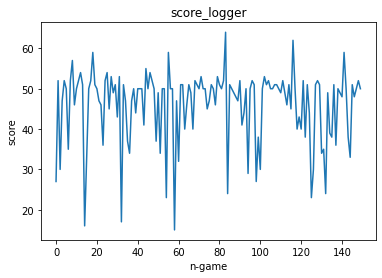

In [ ]:
# Plot Score from Log
plt.plot(cb.log[:,0])
plt.title('score_logger')
plt.xlabel('n-game')
plt.ylabel('score')
plt.show() 

## Testing (vs random)

### Agent Function (2)

In [ ]:
# the agent
class agent_test:
    def __init__(self, fdir):
        self.load_model(fdir)

    def act(self, state):
        q_values = self.model.predict(state.reshape(1,-1))
        return np.argmax(q_values[0])

    def load_model(self, fdir):

        # load json and create model
        json_file = open(fdir + ".json", "r")
        model = json_file.read()
        json_file.close()
        self.model = model_from_json(model)
        
        # load weights into new model
        self.model.load_weights(fdir + ".h5")
        print("Loaded model from disk")

### Hyperparameters (2)

In [ ]:
# hyperparameters and other constants setup

# step size for Adam
LEARNING_RATE = 0.01

# board size
N = 7

# max iteration
MAX_ITER = 1

model_dir = "/content/gdrive/MyDrive/Colab Notebooks/CONGKLAK AI/Model/model"
log_dir = "/content/gdrive/MyDrive/Colab Notebooks/CONGKLAK AI/Log/log_test_vs_random"


### Testing (vs Random)

In [ ]:
# TESTING VS RANDOM

# environment setup
cb = congklak_board()
cb.setup(7, MAX_ITER)
    
# agent setup
player = agent_test(model_dir)
    
# determining whether the agent goes first or second
player_turn = 0  # should we flip the board, train for 1st and 2nd, or the current system is OK?
    
games_played = 0
    
while games_played < MAX_ITER:
    games_played += 1
    cb.reset()
        
    while True:
            
        # agent's move
        if cb.whose_turn() == player_turn:
            if cb.possible_action().shape[0] != 0:
                state = cb.one_hot_state()
                action = player.act(state)
                cb.step(action)
            else:
                cb.end_turn()
        
        # random move
        else:
            if cb.possible_action().shape[0] != 0:
                random_action = np.random.choice(cb.possible_action())
                cb.step(random_action)
            else:
                cb.end_turn()

        # checking whether the game is end or not            
        if cb.done:
            cb.logging(cb.score)
            print("Game " + str(games_played) + " is over. Final score: Player = " + str(cb.score[player_turn]))
            if cb.score[0] == cb.score[1]:
                print("Result: Draw.")
            else:
                if cb.whose_turn() == player_turn:
                    print("Result: Win.")
                else:
                    print("Result: Lose.")
            if games_played >= MAX_ITER*0.2:
                print("Average score of the last " + str(int(MAX_ITER*0.2)) + " games =", cb.log[-1,2])
            break
            
    if games_played%10 == 0:
      cb.log_to_txt(log_dir)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - ETA: 0s

### Evaluate

In [ ]:
json_file = open(model_dir + ".json", "r")
model = json_file.read()
json_file.close()
model = model_from_json(model)

# load weights into new model
model.load_weights(model_dir + ".h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
cb.whose_turn()

0

In [ ]:
cb.state

array([ 9,  4,  9,  7,  0,  0, 13,  3,  5,  0,  1,  4,  6,  0])

In [ ]:
player.model.predict(cb.one_hot_state().reshape(1,-1))

1/1 [==============================] - 0s 26ms/step


array([[2.2935839, 2.0537472, 1.8662763, 2.1095629, 2.784161 , 1.0870943,
        2.3261366]], dtype=float32)

In [ ]:
win = 0
lose = 0

for i in range (len(cb.log)):
    if cb.log[i, player_turn] > cb.log[i, int(not(player_turn))]:
        win += 1
    elif cb.log[i, player_turn] < cb.log[i, int(not(player_turn))]:
        lose += 1

print("Win rate =", win/len(cb.log))
print("Lose rate =", lose/len(cb.log)

SyntaxError: ignored

## Testing (vs human)

### Hyperparameters (3)

In [ ]:
# hyperparameters and other constants setup
EXPLORATION_INIT = 1.0
EXPLORATION_MIN = 0.05
DECAY_RATE = 0.99995

# discount factor
GAMMA = 0.95
# step size for Adam
LEARNING_RATE = 0.001

# maximum capacity of the replay memory
MEMORY_SIZE = 5000

# Number of data samples from the replay memory in one step of training
BATCH_SIZE = 50

# board size
N = 7

# max iteration
MAX_ITER = 1

model_dir = "/content/gdrive/MyDrive/Colab Notebooks/CONGKLAK AI/Model/model"
log_dir = "/content/gdrive/MyDrive/Colab Notebooks/CONGKLAK AI/Log/log_test_vs_human"


### Testing (vs Human)

In [ ]:
# TESTING VS HUMAN

# environment setup
cb = congklak_board()
cb.setup(7, MAX_ITER)
action_space = cb.action_space()
observation_space = cb.observation_space()
    
# agent setup
player = agent(observation_space, action_space, EXPLORATION_INIT, EXPLORATION_MIN, DECAY_RATE, GAMMA, LEARNING_RATE, MEMORY_SIZE, BATCH_SIZE)
player.load_model(model_dir)
    
# determining whether the agent goes first or second
player_turn = random.randrange(2)  # should we flip the board, train for 1st and 2nd, or the current system is OK?
if player_turn == 1:
    print("Human goes first")
else:
    print("Human goes second")
    
games_played = 0
prev_score = 0
    
while games_played < MAX_ITER:
    games_played += 1
    flag = 0
    cb.reset()
        
    while True:
            
        # agent's move
        if cb.whose_turn() == player_turn:
            if cb.possible_action().shape[0] != 0:
                state = cb.one_hot_state()
                action = player.act(state)
                print("Board state now:")
                print(cb.state)
                print("AI to move. AI chooses", action)
                cb.step(action)
            else:
                cb.end_turn()
        
        # human's move
        else:
            if cb.possible_action().shape[0] != 0:
                print("Board state now:")
                print(cb.state)
                human_action = input("Human to move. Please enter which hole's number you want to choose: ")
                cb.step(human_action)
            else:
                cb.end_turn()

        # checking whether the game is end or not            
        if cb.done:
            cb.logging(cb.score)
            print("Game " + str(games_played) + " is over. Final score: AI = " + str(cb.score[player_turn]) + ", Human = " + str(cb.score[int(not(player_turn))]))
            if cb.score[0] == cb.score[1]:
                print("Result: Draw.")
            else:
                if cb.whose_turn() == player_turn:
                    print("Result: AI wins.")
                else:
                    print("Result: Human wins.")
            break

Loaded model from disk
Human goes second
Board state now:
[7 7 7 7 7 7 7 7 7 7 7 7 7 7]
AI to move. AI chooses 3
Board state now:
[8 8 8 0 8 8 8 8 8 0 0 8 8 8]


## Summary

This project runs based on simple arithmetic. its use in real world problems is to determine the best possible scheduling, all kinds of work that use circuit routes, as well as problems related to choice

Through this case, the implementation of reinforcement learning can be used to solve many problems. The advantages of using RL include:
*   Reinforcement learning can be used to solve very complex problems that cannot be solved by conventional techniques.
*   This technique is preferred to achieve long-term results, which are very difficult to achieve.
*   This learning model is very similar to the learning of human beings. Hence, it is close to achieving perfection.
*   The model can correct the errors that occurred during the training process. Once an error is corrected by the model, the chances of occurring the same error are very less. It can create the perfect model to solve a particular problem.
*   In the absence of a training dataset, it is bound to learn from its experience.

Even so there are still some drawbacks or limitations in using RL:
*   Too much reinforcement learning can lead to an overload of states, which can diminish the results.
*   Reinforcement learning is not preferable to use for solving simple problems.
*   Reinforcement learning needs a lot of data and a lot of computation. It is data-hungry. That is why it works really well in video games because one can play the game again and again and again, so getting lots of data seems feasible.
*   Another disadvantage is the curse of real-world samples. For example, consider the case of learning by robots. The robot hardware is usually very expensive, suffers from wear and tear, and requires careful maintenance. Repairing a robot system is costs a lot.

To solve many problems of reinforcement learning, we can use a combination of reinforcement learning with other techniques rather than leaving it altogether. One popular combination is Reinforcement learning with Deep Learning.